In [1]:
import os
import sys

In [2]:
if os.path.abspath('../src') not in sys.path:
    sys.path.insert(0, os.path.abspath('../src'))

In [3]:
from glob import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from counter import SilenceCounter

/local/workspace_1/miniconda3/envs/silence/lib/python3.9/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


### Provide the directory to wav files

In [4]:
wav_directory = "." # modify this to point to where the wav files are
wav_files = glob(os.path.join(wav_directory, "*.wav"))
print(wav_files)

['./down_to_cases.wav']


### Calculate silence duration

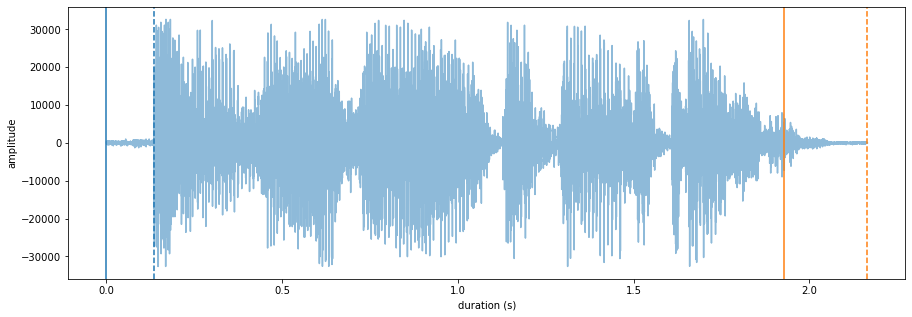

./down_to_cases.wav 0.372


In [5]:
min_silence_sec = 0.01 # modify this to change the minimum length of a silent duration
rel_silence_db_thresh = 0 # modify this to change the maximum relative DB considered as "silent"

# try to do one and sanity check waveform
counter = SilenceCounter(wav_files[0])
silence_secs = counter.count(min_silence_sec=min_silence_sec, visualize=True)
print(wav_files[0], silence_secs)

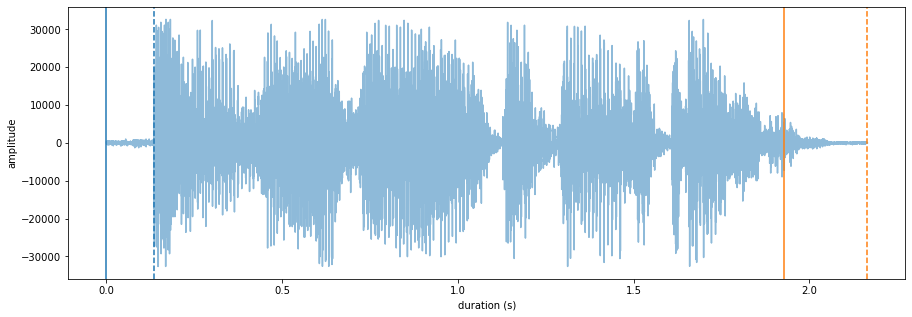

./down_to_cases.wav 0.372


In [6]:
# if pass sanity check, continue with the rest
silence_durations = []

for wav_file in wav_files:
    counter = SilenceCounter(wav_file)
    silence_secs = counter.count(min_silence_sec=min_silence_sec, visualize=True)
    print(wav_file, silence_secs)
    silence_durations.append(silence_secs)

### Save results into a CSV file

In [7]:
save_csv_filename = './silent_result.csv' # modify this to specify where to save the file

df = pd.DataFrame({'filename': wav_files, 'silent_secs': silence_durations})
df.to_csv(save_csv_filename, index=False)